In [139]:

import pandas as pd

#import networkx to visualize crossover data as a network with matplotlib
import networkx as nx
import matplotlib.pyplot as plt


In [140]:
#read in scraped data 

df = pd.read_csv("crossover_links.csv")

In [141]:
df.head()

,from,number_fanfic,to
0,Harry Potter,4022,Twilight
1,Harry Potter,3268,Percy Jackson and the Olympians
2,Harry Potter,2556,Naruto
3,Harry Potter,1867,Avengers
4,Harry Potter,1288,Supernatural


In [142]:
#create an edgelist from the dataframe

g = nx.from_pandas_edgelist(df, 'from', 'to', edge_attr=True)

Text(0.5,1,'Harry Potter Fanfiction Crossovers Network')

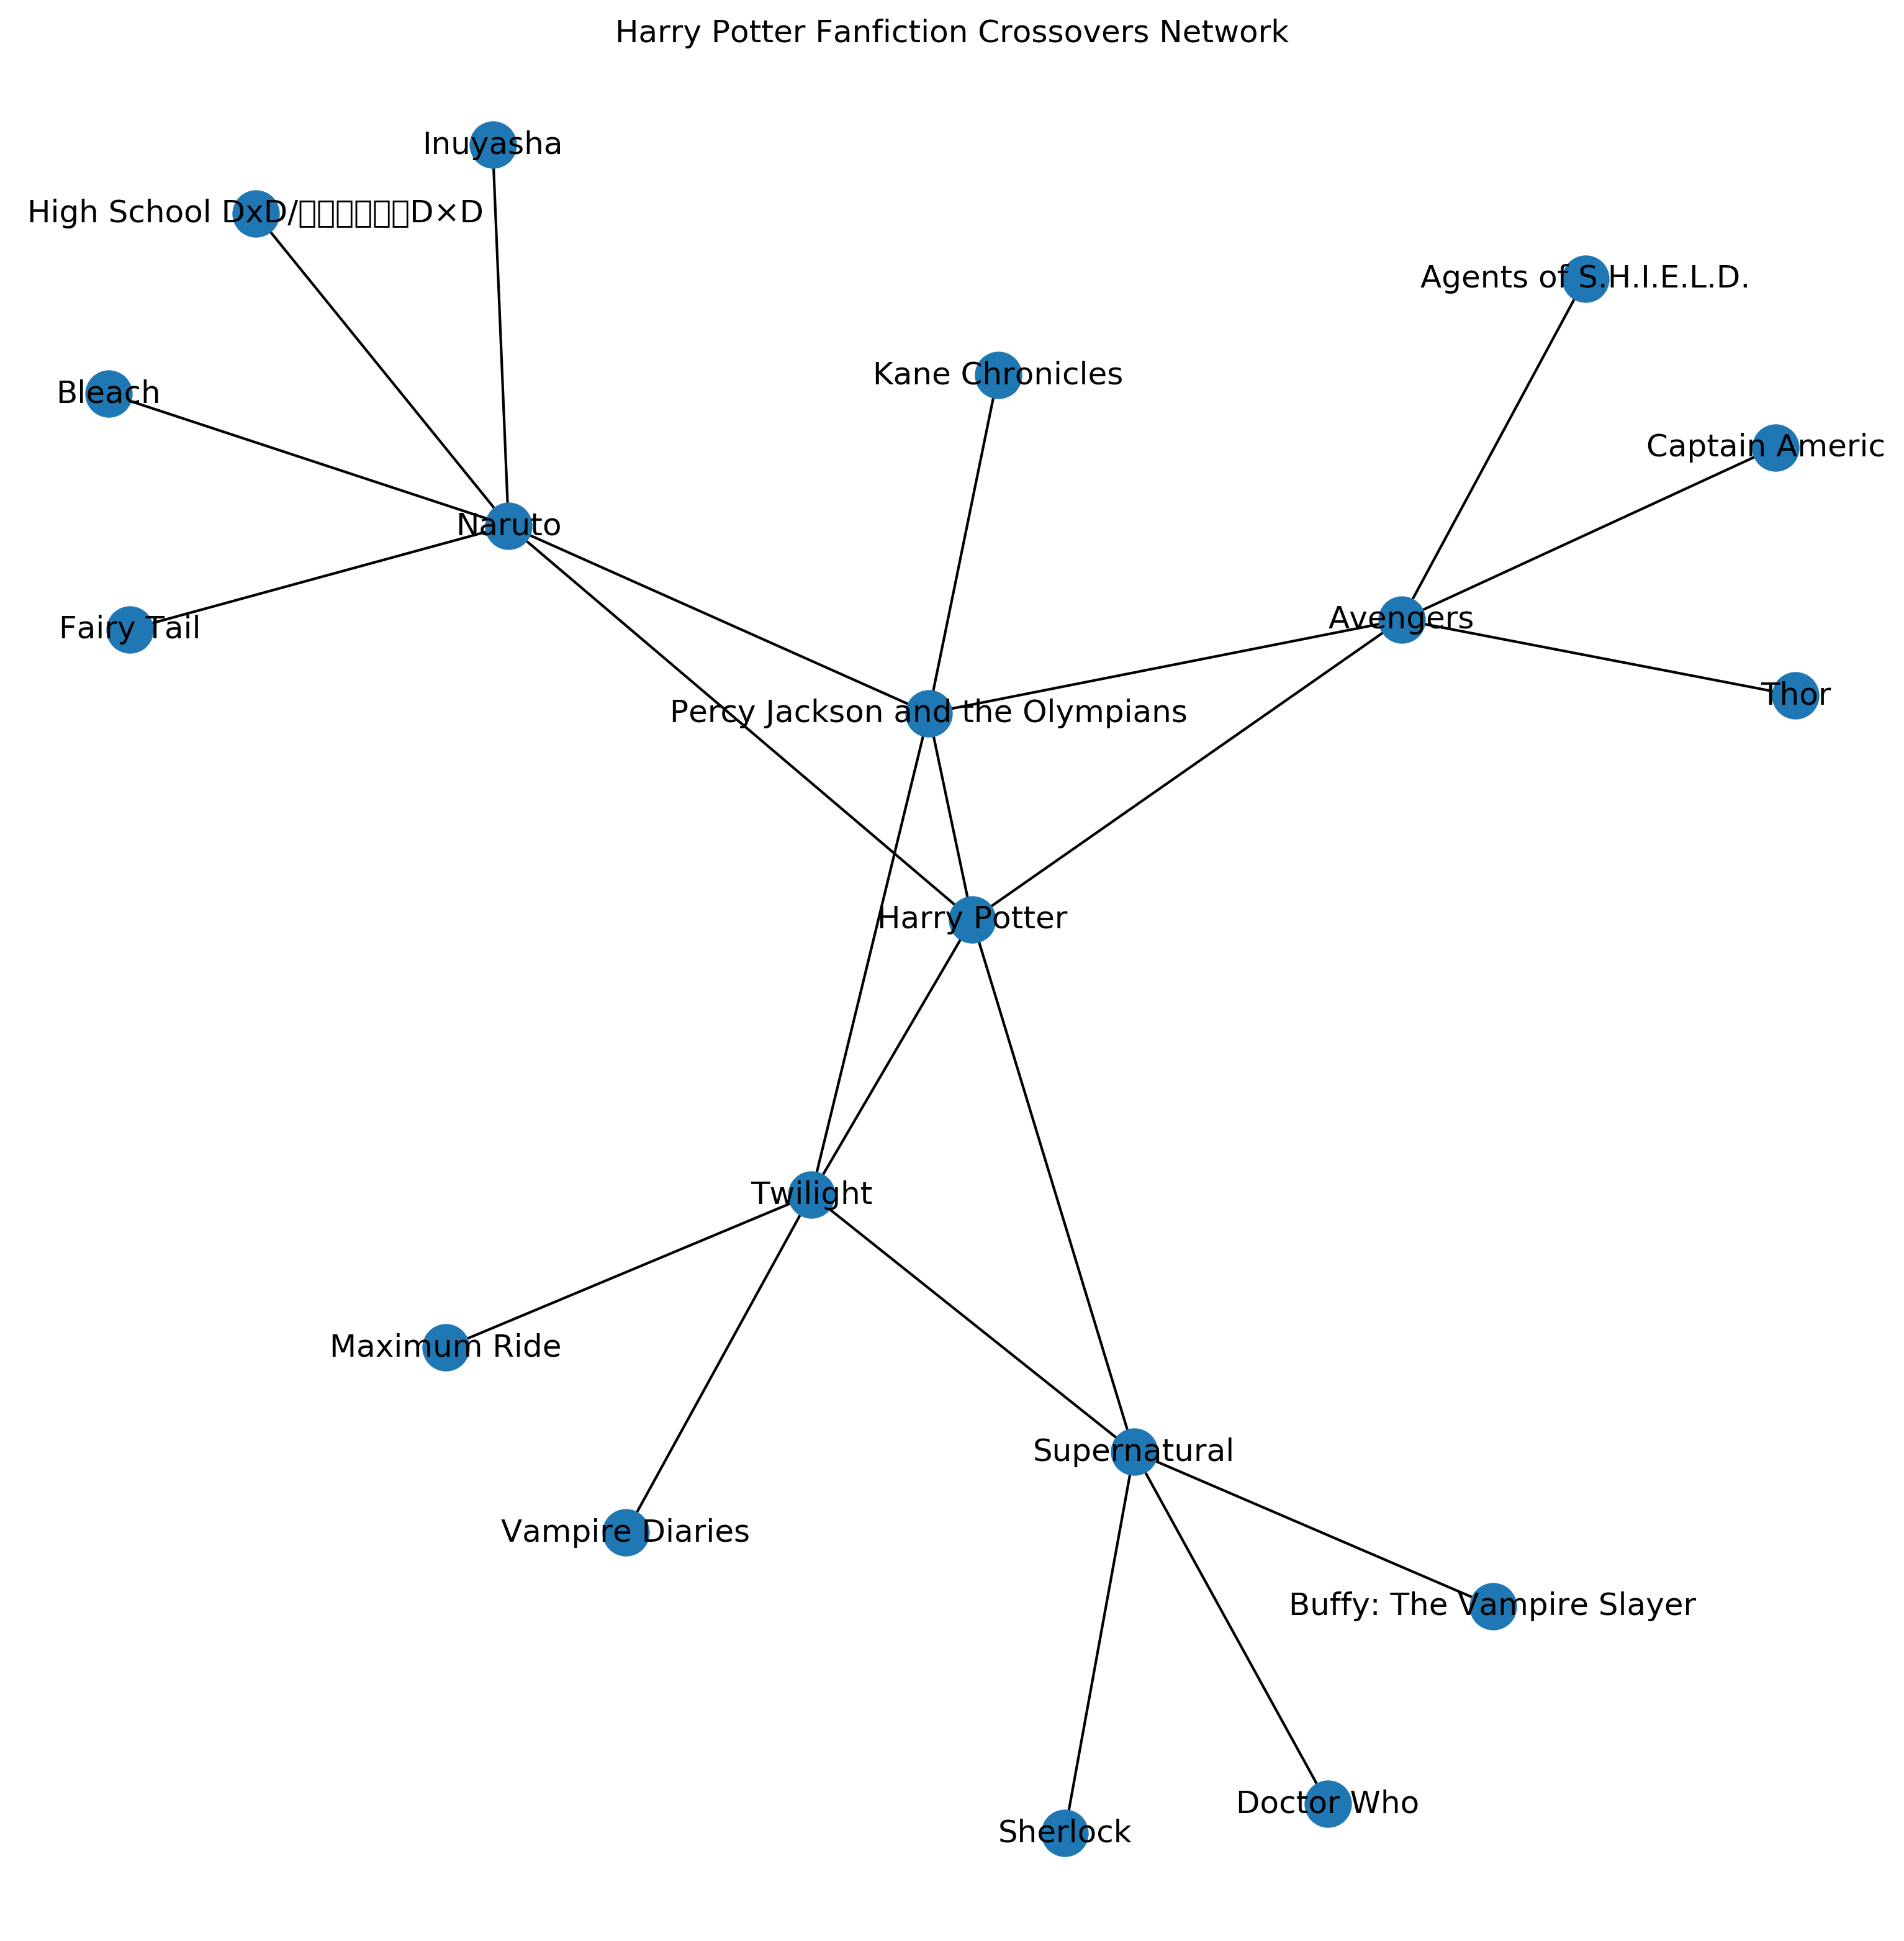

In [143]:
#plot with story labels, uniform node color and size to see inter-connectivity

fig = plt.figure(figsize=(10,10), dpi=300)

nx.draw(g, with_labels=True)

plt.title("Harry Potter Fanfiction Crossovers Network")
#fig.savefig('xover.png', dpi=fig.dpi)

#### Findings:

From the above plot, we can guess only the connectivity but not neccesarily the strength of connection of the associated HP-crossovers. Some observations:

1. Of the primary cross-overs, `Percy Jackson and the Olympians` seems to have connections with most different first-level cross-overs. By 'first-level crossover' I mean the top 5 fandoms having most number of crossovers with HP.

> - `Percy Jackson and the Olympians`: connected with 4 fandoms `Harry Potter`, `Twilight`, `Avengers`, `Naruto`
> - `Twilight`: connected with 3 fandoms `Harry Potter`, `Percy Jackson` and `Supernatural`
> - `Avengers`, `Naruto` and `Supernatural`: are only connected to 1 fandom each besides `Harry Potter`. 

2. `Naruto` has the most niche 'second-level crossovers' ie. the fandoms it has cross-overs with besides `Harry Potter`

- I scraped 5 top cross-overs for each 'first-level crossover', and some of these fandoms have cross-overs with other 'first-level cross-overs'. 

> - None of 4 second level crossovers(excluding HP) for `Naruto` have connection with any other fandom.
> - `Twilight` has most connected 'second level crossovers' at 3 (including HP)


In [144]:
#Make node_size equal to number of shared fanfics from df

node_sizes = df.number_fanfic.tolist()

Text(0.5,1,'Harry Potter Fanfiction Crossovers Network')

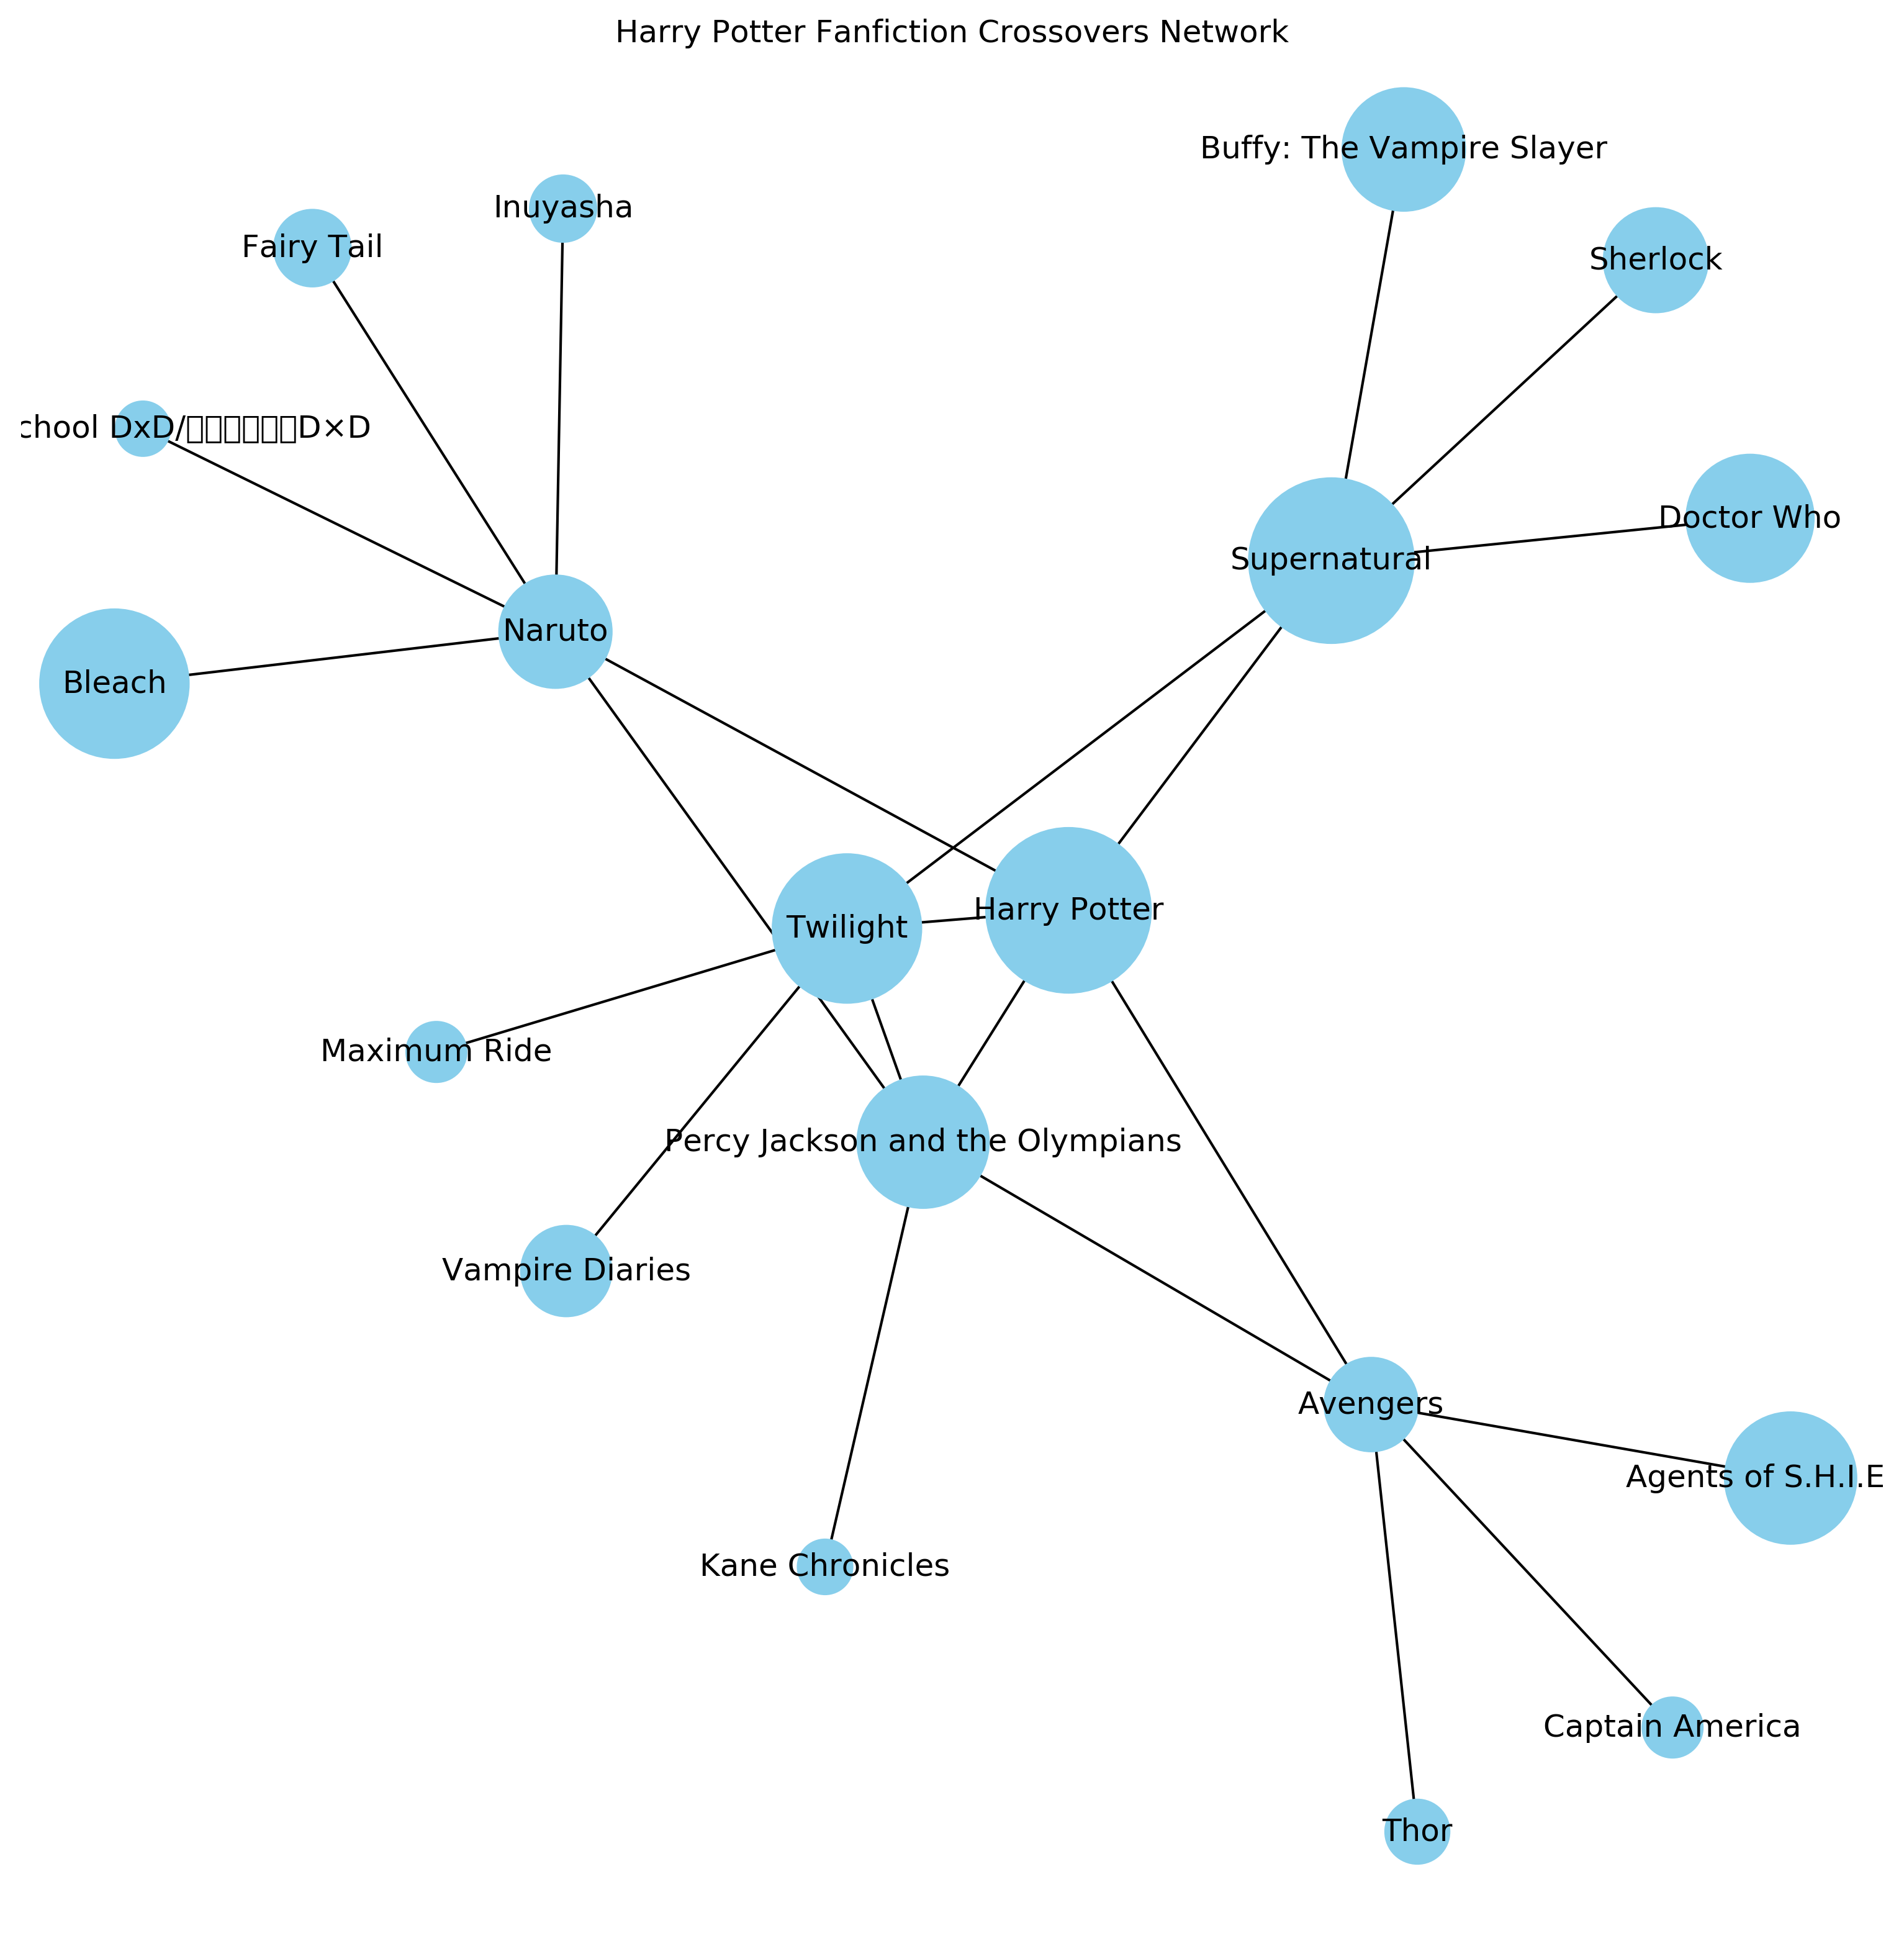

In [145]:
#plot with story labels, and node size corresponding to shared stories to see inter-connectivity
#with a specific algorithm to decide node layout

fig = plt.figure(figsize=(10,10), dpi=300)

nx.draw(g, with_labels=True, node_size= node_sizes, node_color="skyblue", pos=nx.fruchterman_reingold_layout(g))

plt.title("Harry Potter Fanfiction Crossovers Network")
#fig.savefig('xover_nodes.png', dpi=fig.dpi)

#### Findings:

The node_sizes are based on the edge_values: the number of shared fanfics between the nodes of Edge1. 

Clearly, the diagram is not representative of what the reality is. By using the column directly its unclear. The column will need to be wrangled to create a node_size list for a value corresponding to every node which I will do shortly. 

#### Changing Node-size: 
We can use the `nodelist` and `node_size` function arguments to define the nodesize for each fandom based on `number_fanfic` column. In order to do that, we will create two lists `nodelist` and `node_size`:

`nodelist`: a list of all fandoms 
`node_size`: number of fanfictions written for that specific crossover. For 'first_level' fanfoms this would be the number of fanfics they share with HP, for the rest it would be a sum of all crossover fanfictions with any fandom. For HP, it would be the sum of the top 5 fandoms we have pulled. 

In [146]:
#create a list of dicts with key being the fandom and the value being the number of fanfics

#1.start with HP
val = []
val.append({'Harry Potter' : df[df['from'] == 'Harry Potter']['number_fanfic'].sum()})

In [147]:
#extract all 'first level' fandoms

chars_primary = df['from'].unique().tolist()

#remove HP from it
chars_primary.remove('Harry Potter')

#find the number of fanfics for each
for cp in chars_primary:
    temp = df['number_fanfic'][(df['from'] == 'Harry Potter') & (df['to'] == cp)].tolist()[0]
    val.append({cp:temp})

In [148]:
#create a list of all 'second level' fandoms

chars = df.to.unique().tolist()

chars.remove('Harry Potter')

for c in chars_primary:
    chars.remove(c)

#find the number of fanfics for each    
for c in chars: 
    val.append({c : df[df['to'] == c]['number_fanfic'].sum()})    

In [149]:
#create node_size list by extracting values from dicts

node_size = [list(v.values()) for v in val]
node_size = [n for sublist in node_size for n in sublist]

In [150]:
#create nodelist list by extracting keys from dicts

nodelist = [list(v.keys()) for v in val]
nodelist = [n for sublist in nodelist for n in sublist]

Text(0.5,1,'Harry Potter Fanfiction Crossovers Network')

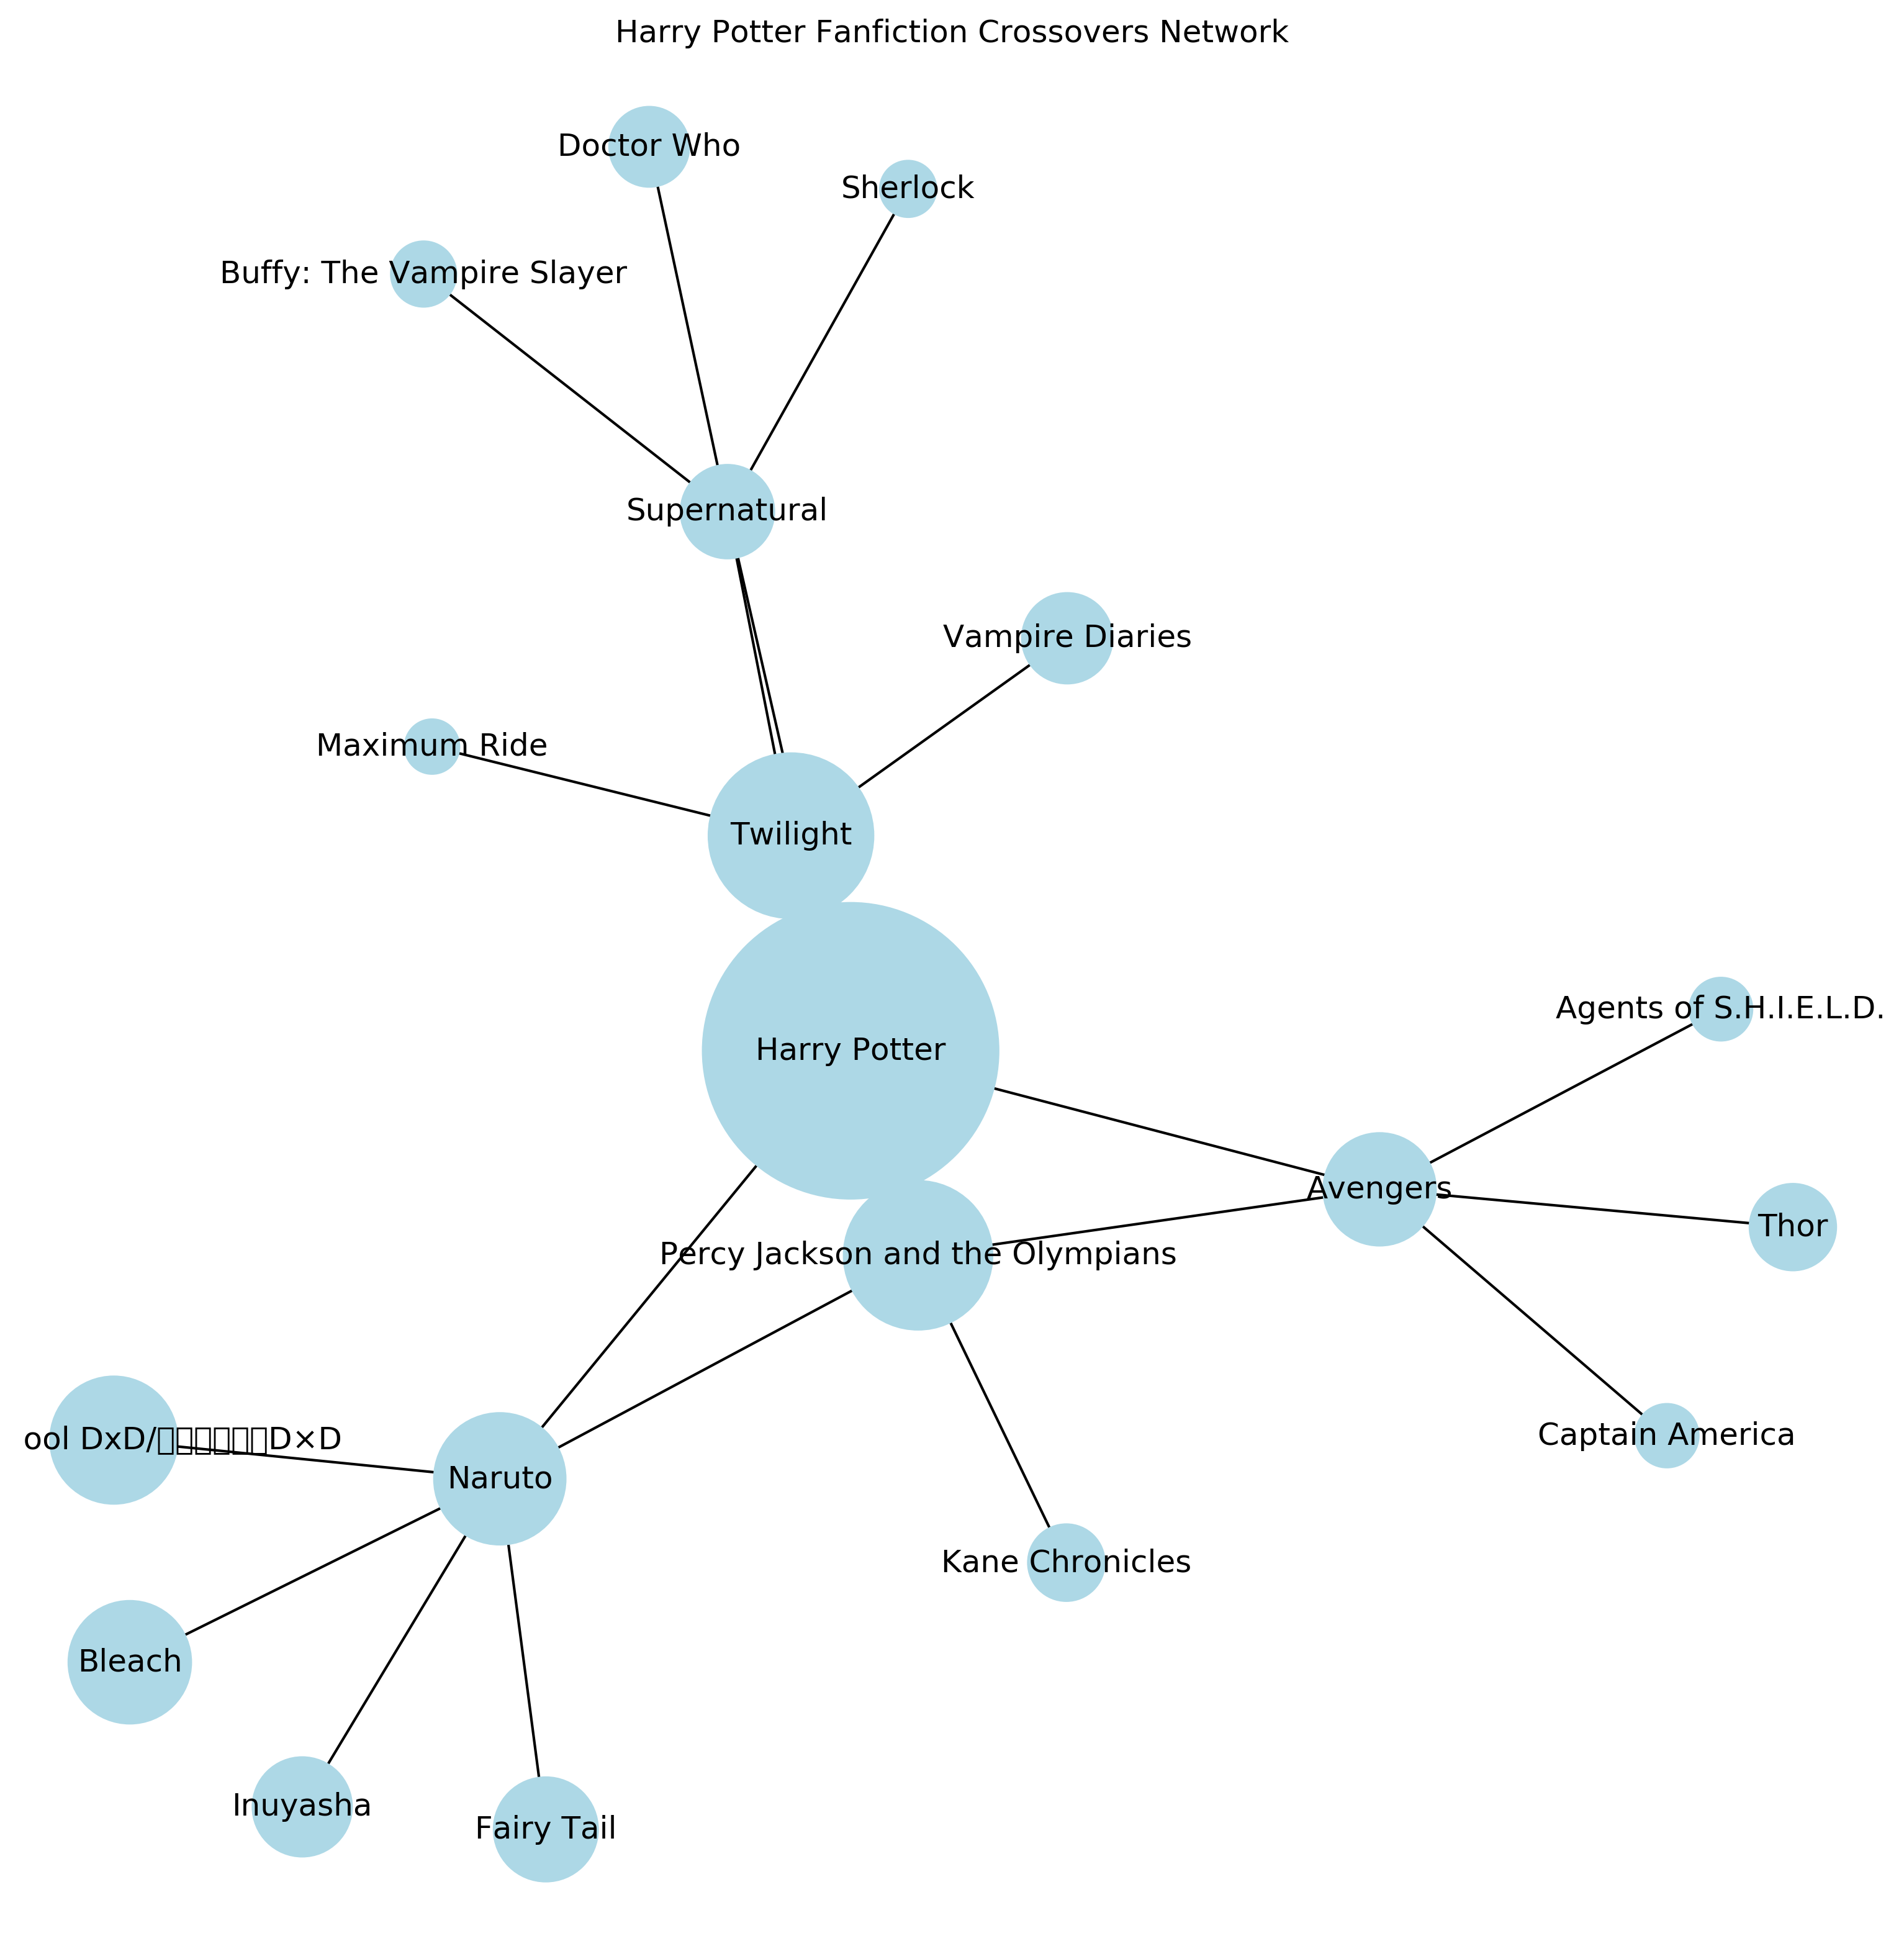

In [151]:
#build the network diagram with proportional node_sizes 

fig = plt.figure(figsize=(10,10), dpi=300)

nx.draw(g, with_labels=True, nodelist = nodelist, node_size= node_size, node_color="lightblue", pos=nx.fruchterman_reingold_layout(g))

plt.title("Harry Potter Fanfiction Crossovers Network")
#fig.savefig('xover_nodes.png', dpi=fig.dpi)

#### Findings:

We can see that the node size is now proportional to the number of crossover fanfics.
- HP obviously has the highest number of stories. Among the 'first level' nodes `Twilight` seems to be the highest and `Percy Jackson` and `Naruto` roughly similarly placed.
- The sizes of 'second level' nodes confusingly looks similar to 'first level' nodes in many cases. This is because the number indicates the total crossover fanfic they have with that specific fandom, whereas the node-size of 'first-level' fandom is dependent on its crossover volume with HP. 

#### Further Analysis:

Additionally, we can also color the first and second level nodes differently for better analysis. We could also base node_size on the degree of the node, which will help us see the interconnectivity better. 

R's networkD3 package is interactive as compared to the static plots of matplotlib-networkx. However, as it is based on javascript it requires more data wrangling to fit it into the forcenetwork diagram function. 